### 1. Brief Overview


### Penalized Regression :
- 많은 수의 피쳐가 있는 상태에서 간결한 모델을 만드는 데 일반적으로 사용되는 기술
- overfit 이나 computational challenges를 회피하기 위함
- 계수에 페널티를 부여하여 정규화하는 것

#### Ridge : L2 Norm

$$ J(θ)= MSE(θ) + α\sum_{i=1}^N θ_i^2 $$

#### Lasso : L1 Norm

$$ J(θ)= MSE(θ) + α\sum_{i=1}^N \left| θ_i \right|$$



### 2. Why Penalize the Magnitude of Coefficients?


- 모델 복잡성이 계수의 크기에 미치는 영향의 예시
- 예를 들어, 사인 곡선  (60 ° ~ 300 ° ) 을 시뮬레이션하고 임의의 노이즈를 추가.

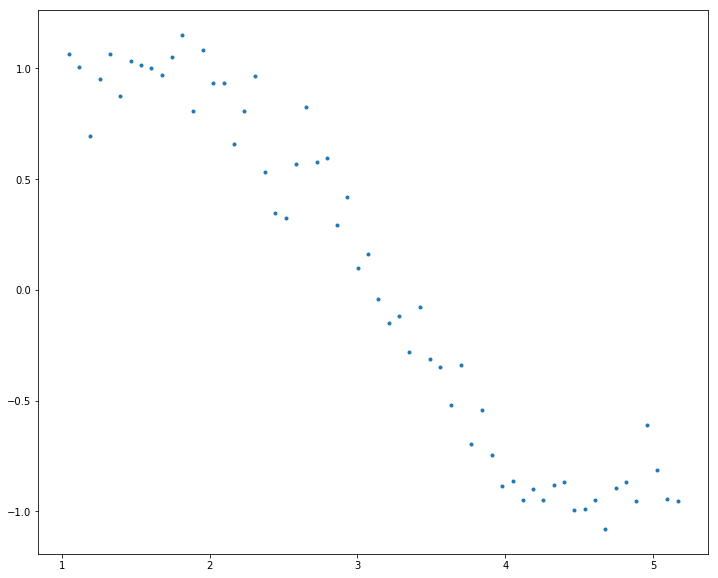

In [3]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

# 60 ~ 300 까지의 각도가 라디안으로 변환 된 입력 배열 정의
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

#### x_1(일차항)에서 X_15(15제곱)을 가진 다항식 회귀식을 사용하여 사인 함수를 예측
#### power -> 사용 피쳐의 갯수를 표현한 것

In [4]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [5]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

- 모델의 RSS 및 계수를 반환
- 5 가지 모델을 모두 만들고 결과를 비교

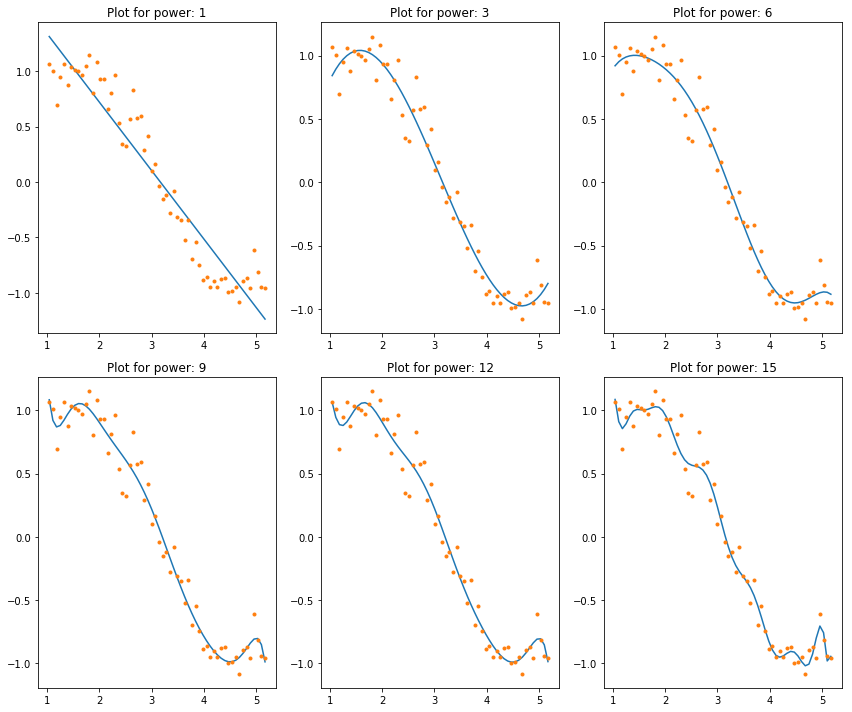

In [6]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

#### 그래프를 보면 복잡성이 높은 모델이 데이터에 더 잘 부합하고 RSS 값이 낮아질 것으로 기대할 수 있음

#### 하지만 모델의 복잡성이 증가함에 따라 계수 의 크기가 기하 급수적으로 증가!!!

In [7]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


### 큰 계수의 의미? 
#### 오버피팅!! 
#### 복잡한 관계를 모델링하여 추정되었지만 특정 트레인 셋에 지나치게 피팅된 것.
#### -> penalized model 의 필요성!!

### 3. Ridge Regression
-  L2 정규화 항을 추가된 것. 즉, 최적화 목표에 계수의 제곱의 합을 추가
- Objective = RSS + α * (sum of square of coefficients)
- α는 정규화 텀 정도를 조절하는 하이퍼파라미터(α = 0 이면 그냥 회귀식과 동일)

In [8]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

#### 최적 alpha를 찾기 위한 시뮬레이션

C:\Users\good\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0909571327677725e-17 / 1.1102230246251565e-16
  RuntimeWarning)


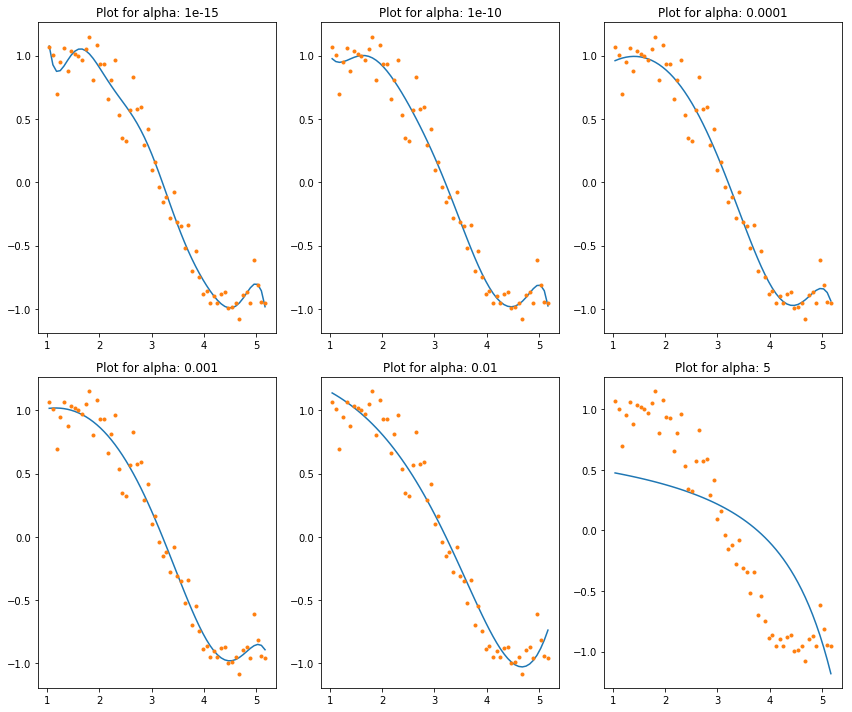

In [9]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

#### 알파 값이 커질수록 모델이 단순화되는 것을 볼 수 있다.
#### -> 알파를 크게 할수록 정규화 항의 효과가 커진다. 
#### 알파값과 계수의 관계를 분석해본다면 

In [10]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,94,-2.9e+02,3.7e+02,-2.3e+02,62,1.3,-4.2,0.28,0.24,-0.033,-0.0073,0.0014,0.00015,-5.3e-05,4e-06,-7.8e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


#### 관찰 된 결과
- 알파가 증가하면 RSS가 증가하므로 모델의 복잡성이 줄어든다.
- 큰 알파는 계수의 크기를 크게 줄인다.
- 따라서 너무 높은 알파 값은 중요한 언더 피팅으로 이어질 수 있다. 알파 값이 1보다 큰 경우 RSS의 급격한 증가를 볼 수 있다.
- 계수는 매우 작지만 0 이 아니다.

In [11]:
# 모든 15 개의 계수가 크기가 0보다 큰지 확인
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

### 4. Lasso Regression
- Lasso 회귀는 L1 정규화를 수행
- 즉, 최적화 목표에서 계수의 절대 값 합계를 더하는 것 
- Objective = RSS + α * (sum of absolute value of coefficients)

In [12]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\good\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


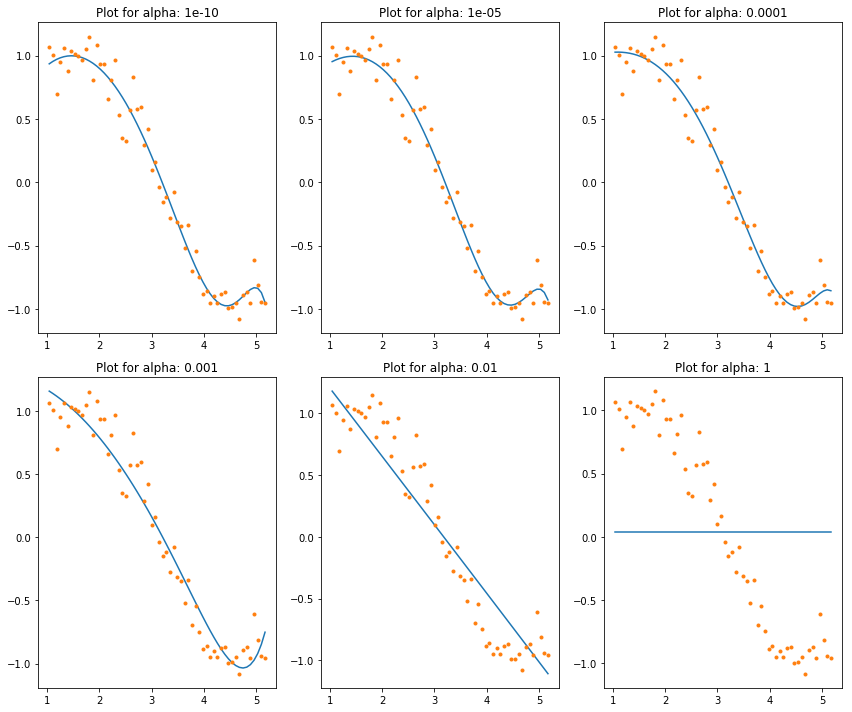

In [13]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

- 알파의 값이 증가함에 따라 모델의 복잡도가 감소 함을 다시 한번 나타냅니다. 
- α = 1에서 직선이 이상하다.

#### 테이블로 확인해보면

In [14]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
alpha_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
alpha_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


- 같은 값의 alpha의 경우, lasso 회귀 계수는 ridge regression의 계수와 비교할 때 훨씬 작음 (2 개 테이블의 행 1 비교).
- 동일한 알파의 경우, lasso는 ridge 회귀와 비교하여 RSS가 높다 (적합도가 낮다).
- 매우 작은 알파 값의 경우에도 계수 중 많은 수가 제로.

In [15]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

- 몇몇 계수가 0인 것을 볼 수 있다. -> 희소성(sparcity)
- 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 완전히 제거하려고 한다는 점(즉, 가중치가 0이 된다.)
- 라쏘는 특성선택을 자동으로 하고 Sparse model을 만든다고 볼 수 있다.

### 5. Elastic Net
- 릿지와 라쏘를 절충한 모델
- 혼합의 정도를 r로 사용해 조절 (r = 0이면 릿지와 같고,  r = 1이면 라쏘와 같다.)
- Objective 함수
$$ J(θ)= MSE(θ) + r α\sum_{k=1}^N \left| θ_i \right| + \frac{1-r}{2} α\sum_{k=1}^N θ_i^2 $$




sklearn 통한 Ridge, Lasso regression 사용법
-------------


Automatically created module for IPython interactive environment


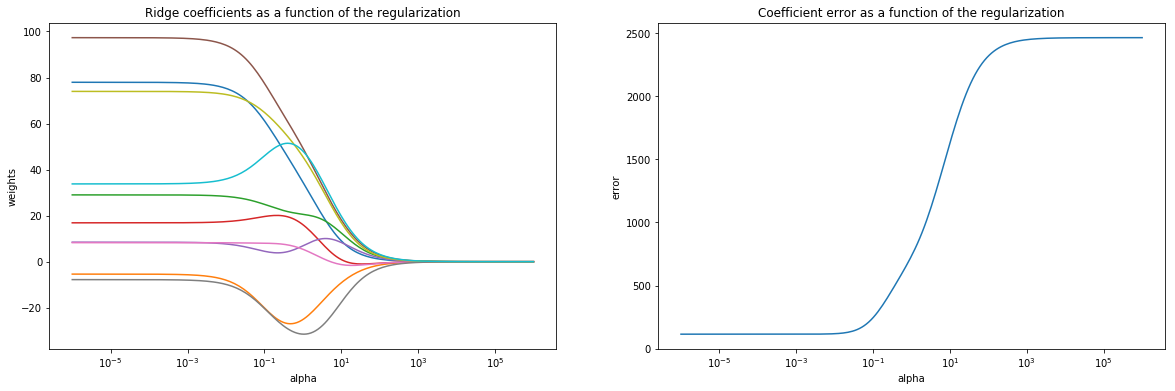

In [16]:

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

### sklearn 을 통한 교차검증(Cross Validation)

* data를 train set과 test set으로 단순 분리
    - data splitter
    	+ train_test_split() 명령



* 복수의 test set 준비
    - cross validation generator
        + KFold
        + LeaveOneOut
        + ShuffleSplit
        
        
* 복수의 test set 사용하여 평가 과정 반복
    - cross validation calculator
    - cross_val_score()

### 단순 데이터 분리

train_test_split() 명령은 데이터를 단순히 트레이닝 데이터와 테스트 데이터로 분리한다.


* 인수
    - arrays : 데이터
    - test_size : 테스트 데이터 사이즈
    - train_size : 사이즈
    - random_state : 난수 시드
    

* 반환값
    - 배열 리스트

In [17]:
X = np.arange(10).reshape((5, 2))
y = np.arange(5)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### Cross-Validation
KFold 클래스를 비롯한 교차 검증 클래스 객체들은 Cross Valiation Generator 들로서 트레이닝/테스트용 
데이터 인덱스를 내보내는 iterator를 출력하는 split 메서드를 제공한다.

K-fold CV
K-fold CV(cross-validation) 방법은 데이터 셋을 K개의 sub-set로 분리하는 방법이다. 
분리된 K개의 sub-set 중 하나만 제외한 K-1개의 sub-sets를 training set으로 이용하여 K개의 모형 추정한다.



In [19]:
N = 5
X = np.arange(8 * N).reshape(-1, 2) * 10
y = np.hstack([np.ones(N), np.ones(N) * 2, np.ones(N) * 3, np.ones(N) * 4])
print("X:\n", X, sep="")
print("y:\n", y, sep="")

X:
[[  0  10]
 [ 20  30]
 [ 40  50]
 [ 60  70]
 [ 80  90]
 [100 110]
 [120 130]
 [140 150]
 [160 170]
 [180 190]
 [200 210]
 [220 230]
 [240 250]
 [260 270]
 [280 290]
 [300 310]
 [320 330]
 [340 350]
 [360 370]
 [380 390]]
y:
[ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.]


In [20]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle=True, random_state=0)
for train_index, test_index in cv.split(X):
    print("test index :", test_index)
    print("." * 80 )        
    print("train index:", train_index)
    print("=" * 80 )

test index : [ 1  6  8 10 17 18 19]
................................................................................
train index: [ 0  2  3  4  5  7  9 11 12 13 14 15 16]
test index : [ 2  4  5  7  9 13 14]
................................................................................
train index: [ 0  1  3  6  8 10 11 12 15 16 17 18 19]
test index : [ 0  3 11 12 15 16]
................................................................................
train index: [ 1  2  4  5  6  7  8  9 10 13 14 17 18 19]


### 참고) Leave-One-Out (LOO)
- 하나의 sample만을 test set으로 남긴다.


In [21]:
from sklearn.model_selection import LeaveOneOut

cv = LeaveOneOut()

for train_index, test_index in cv.split(X):
    print("test X:", X[test_index])
    print("." * 80 )        
    print("test y:", y[test_index])
    print("=" * 80 )

test X: [[ 0 10]]
................................................................................
test y: [ 1.]
test X: [[20 30]]
................................................................................
test y: [ 1.]
test X: [[40 50]]
................................................................................
test y: [ 1.]
test X: [[60 70]]
................................................................................
test y: [ 1.]
test X: [[80 90]]
................................................................................
test y: [ 1.]
test X: [[100 110]]
................................................................................
test y: [ 2.]
test X: [[120 130]]
................................................................................
test y: [ 2.]
test X: [[140 150]]
................................................................................
test y: [ 2.]
test X: [[160 170]]
......................................................................

### 참고 ) ShuffleSplit
- 중복된 데이터를 허용


In [22]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=.5, random_state=0)

for train_index, test_index in cv.split(X):
    print("test X:\n", X[test_index])
    print("=" * 20 ) 

test X:
 [[360 370]
 [ 20  30]
 [380 390]
 [160 170]
 [200 210]
 [340 350]
 [120 130]
 [260 270]
 [ 80  90]
 [ 40  50]]
test X:
 [[220 230]
 [ 20  30]
 [360 370]
 [340 350]
 [ 40  50]
 [240 250]
 [380 390]
 [320 330]
 [200 210]
 [  0  10]]
test X:
 [[300 310]
 [260 270]
 [240 250]
 [100 110]
 [220 230]
 [ 40  50]
 [160 170]
 [120 130]
 [ 60  70]
 [340 350]]
test X:
 [[360 370]
 [  0  10]
 [260 270]
 [ 40  50]
 [ 60  70]
 [340 350]
 [140 150]
 [240 250]
 [280 290]
 [320 330]]
test X:
 [[140 150]
 [ 20  30]
 [ 40  50]
 [380 390]
 [100 110]
 [360 370]
 [160 170]
 [340 350]
 [300 310]
 [320 330]]



### 교차 평가 시행

CV는 단순히 데이터 셋을 나누는 역할을 수행할 뿐이다. 실제로 모형의 성능(편향 오차 및 분산)을 구하려면 이렇게 나누어진 데이터셋을 사용하여 평가를 반복하여야 한다. 이 과정을 자동화하는 명령이 cross_val_score() 이다.

* cross_val_score(estimator, X, y=None, scoring=None, cv=None)

    - cross validation iterator cv를 이용하여 X, y data 를 분할하고 estimator에 넣어서 scoring metric을 구하는 과정을 반복

    - 인수
        + estimator : ‘fit’메서드가 제공되는 모형
        + X : 배열(독립 변수 데이터)
             
        + y : 배열(종속 변수 데이터)
        + scoring : 성능 검증에 사용할 함수
        + cv : CrossValidator
            * None 이면 디폴트인 3폴드 CV
            * 숫자 K 이면 K-폴드 CV
            * Cross Validator 클래스 객체
    - 반환값
        + scores
                


In [23]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X, y, coef = make_regression(n_samples=1000, n_features=1, noise=20, coef=True, random_state=0)

model = LinearRegression()
cv = KFold(10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([ 0.95636425,  0.94908323,  0.93880683,  0.92906829,  0.93119768,
        0.95362566,  0.93217768,  0.94308775,  0.94579305,  0.94749884])

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, scoring="r2", cv=cv)

array([ 0.95636425,  0.94908323,  0.93880683,  0.92906829,  0.93119768,
        0.95362566,  0.93217768,  0.94308775,  0.94579305,  0.94749884])